In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from scipy import stats

In [2]:
# Reading the combined data set
sent_columns = ['neg', 'neu', 'pos'] #All columns related to sentiment of the speeches
happy_columns = ['Life Ladder', 'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Positive affect', 'Negative affect'] # All columns related to the happiness dataset

data = pd.read_csv("Data/full_dat.csv", index_col=[0,1])[sent_columns + happy_columns]
data.dropna(inplace=True) # Dropp all rows with a NaN

In [3]:
data.head()

neg    neu    pos  Life Ladder  Log GDP per capita  \
Country Year                                                         
Austria 2006  0.074  0.743  0.183     7.122211           10.841940   
        2008  0.078  0.683  0.239     7.180954           10.886662   
        2010  0.060  0.698  0.242     7.302679           10.861471   
        2011  0.063  0.723  0.214     7.470513           10.886909   
        2012  0.094  0.693  0.213     7.400689           10.889132   

              Social support  Healthy life expectancy at birth  \
Country Year                                                     
Austria 2006        0.936350                         70.760002   
        2008        0.934593                         71.080002   
        2010        0.914193                         71.400002   
        2011        0.944157                         71.540001   
        2012        0.945142                         71.680000   

              Freedom to make life choices  Generosity  \
Country Year                                             
Austria 2006                      0.941382    0.302386   
        2008                      0.879069    0.291309   
        2010                      0.895980    0.130891   
        2011                      0.939356    0.131578   
        2012                      0.919704    0.117804   

              Perceptions of corruption  Positive affect  Negative affect  
Country Year                                                               
Austria 2006                   0.490111         0.823105         0.173812  
        2008                   0.613625         0.832170         0.173195  
        2010                   0.546145         0.814719         0.155793  
        2011                   0.702721         0.789471         0.145238  
        2012                   0.770586         0.822248         0.156675

# Cleaning data

In [4]:
nans = data.isnull().sum().sort_values(ascending=False)
relative = nans/data.shape[0]
pd.concat([nans, relative], axis=1, keys=['Total missing', 'Percent missing'])

,Total missing,Percent missing
neg,0,0.0
neu,0,0.0
pos,0,0.0
Life Ladder,0,0.0
Log GDP per capita,0,0.0
Social support,0,0.0
Healthy life expectancy at birth,0,0.0
Freedom to make life choices,0,0.0
Generosity,0,0.0
Perceptions of corruption,0,0.0


The amount of missing data is fairly low. So we can allow ourselves to just remove all rows containing missing data.

In [5]:
data.dropna(inplace=True) # Dropp all rows with a NaN

# Column information

In [6]:
[print(data[x].describe(), "\n") for x in data.columns]

count    1507.000000
mean        0.080768
std         0.029600
min         0.014000
25%         0.060000
50%         0.078000
75%         0.098000
max         0.268000
Name: neg, dtype: float64 

count    1507.000000
mean        0.739939
std         0.038600
min         0.611000
25%         0.715000
50%         0.740000
75%         0.765000
max         0.880000
Name: neu, dtype: float64 

count    1507.000000
mean        0.179273
std         0.032790
min         0.073000
25%         0.157000
50%         0.180000
75%         0.200000
max         0.294000
Name: pos, dtype: float64 

count    1507.000000
mean        5.444021
std         1.146430
min         2.375092
25%         4.578878
50%         5.321928
75%         6.270446
max         7.970892
Name: Life Ladder, dtype: float64 

count    1507.000000
mean        9.323049
std         1.162785
min         6.635322
25%         8.373846
50%         9.465227
75%        10.257615
max        11.648169
Name: Log GDP per capita, dtype: float64

[None, None, None, None, None, None, None, None, None, None, None, None]

In [7]:
data.columns

Index(['neg', 'neu', 'pos', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect'],
      dtype='object')

# Normalizing the data

In [8]:
def scale_df(dataframe, columns):
    # Normalizes all given columns in a dataframe
    for col in columns:
        dataframe[col] = (dataframe[col] - dataframe[col].min()) / (dataframe[col].max() - dataframe[col].min())

# scale_df(data, sent_columns + happy_columns) # Normalize all relevant columns

# Distribution of columns

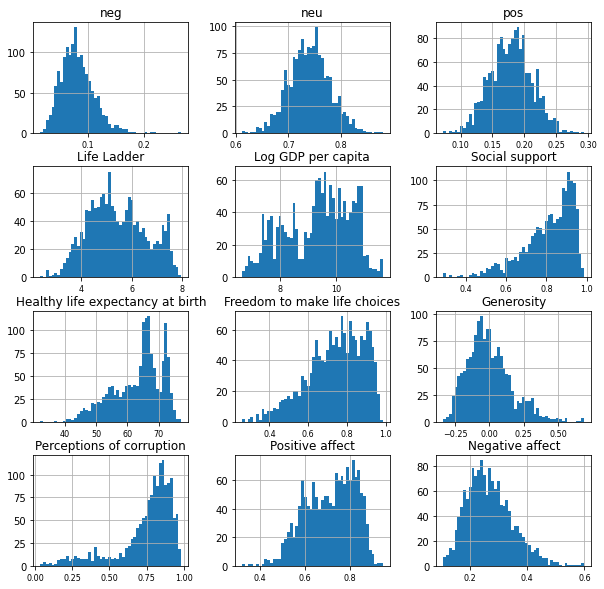

In [9]:
data.hist(figsize=(10, 10), bins=50, xlabelsize=8);

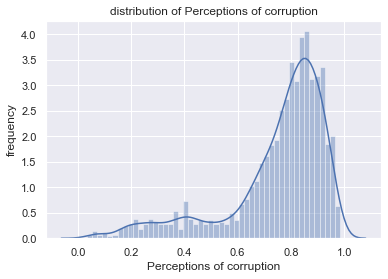

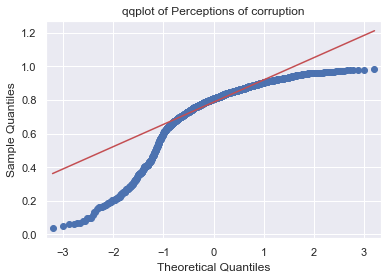

P-value is: 3.014184252660264e-37
So the data does not follow a normal distribution.


In [24]:
def view_normal_distibution(dataframe, col_name, n_bins=50):
    # Vizualises the normality of a given column. also performs a shapiro-wilk test
    x = dataframe[col_name]
    sns.distplot(x, bins=n_bins)
    plt.ylabel('frequency')
    plt.xlabel(col_name)
    plt.title('distribution of ' + col_name)
    plt.show()
    
    sm.qqplot(x, line ='q')
    plt.title('qqplot of ' + col_name)
    plt.show()
    
    p_value = stats.shapiro(x)[1]
    print("P-value is: " + str(p_value))
    if p_value > 0.05:
        print("So the data follow a normal distribution.")
    else:
        print("So the data does not follow a normal distribution.")
    
    
    
view_normal_distibution(data, 'Perceptions of corruption')

TODO: Some columns dont follow the normal distribution. However i think we can make them fit a normal distribution using transforms

"Neg" is positively skewed and can be transformed using sqrt(x)

In [25]:
data['neg'] = np.sqrt(data['neg'])

# Correlation of columns

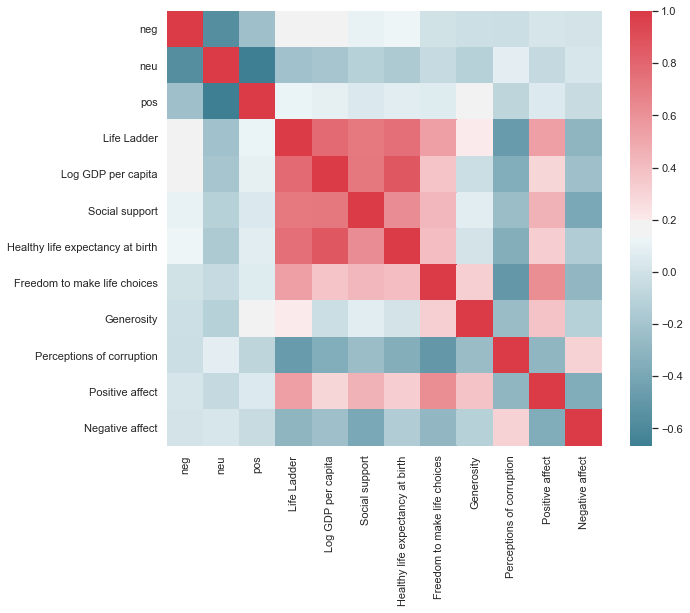

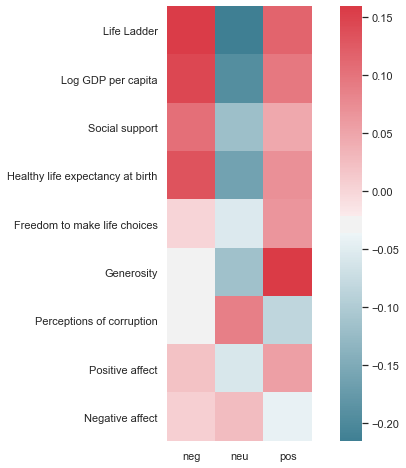

In [26]:
data_cor = data.corr()
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(data_cor, cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.show()


cor_sub = data_cor.drop(sent_columns)
cor_sub = cor_sub.drop(happy_columns, axis=1)
f, ax = plt.subplots(figsize=(10, 8))
corr = cor_sub
sns.heatmap(cor_sub, cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.show()

# Exploring some of the relationships

"Life Ladder" and "Log GDP per capita" both seem to have a relatively strong correlation with all the sentiment scores. Lets explore that some more

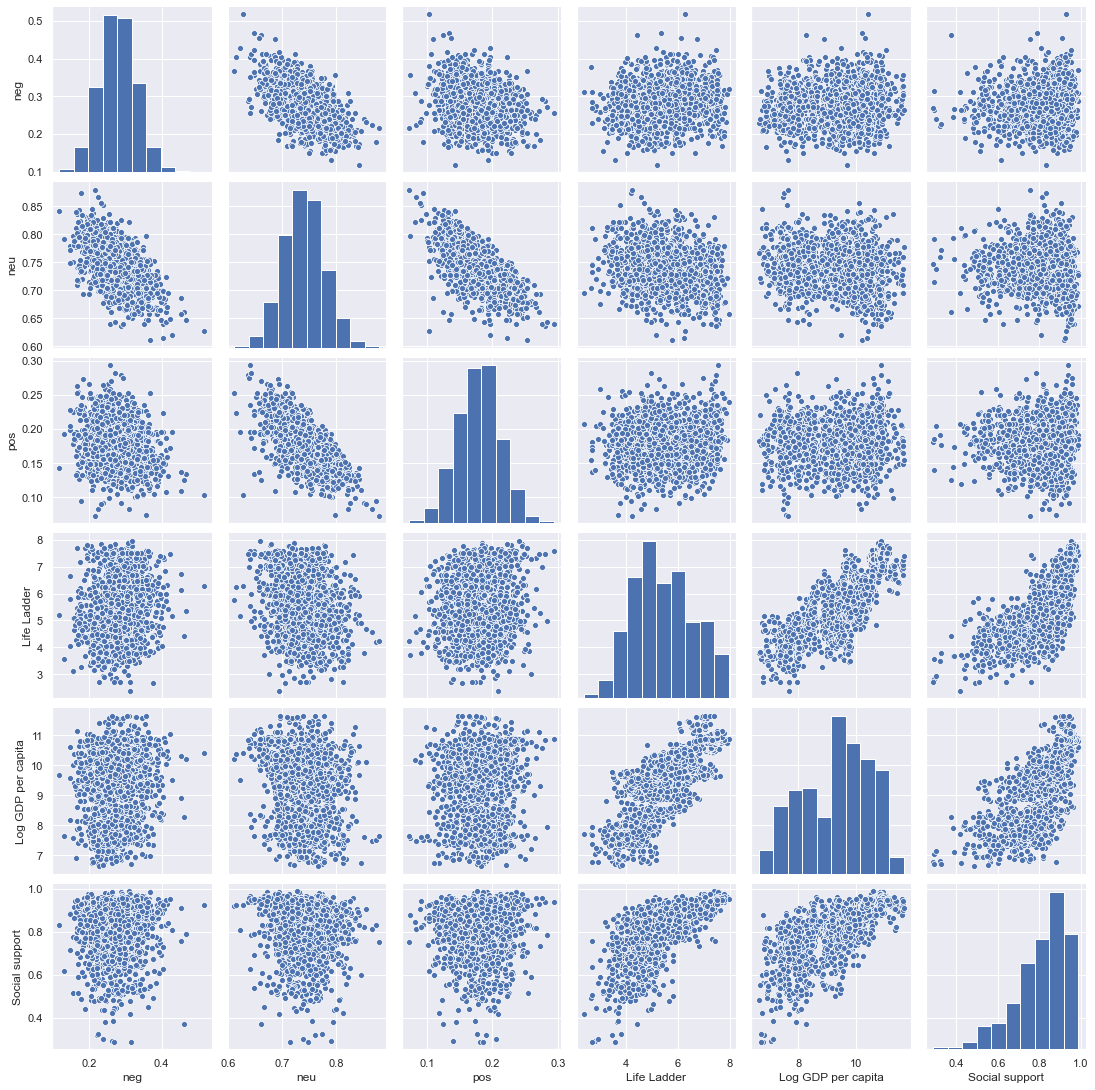

In [27]:
sns.set()
cols = ["neg", "neu", "pos", "Life Ladder", "Log GDP per capita", "Social support"]
t = sns.pairplot(data[cols], height = 2.5)

Thats maybe a little on the large side. We dont really need to compare data within the datasets. Lets remove those:

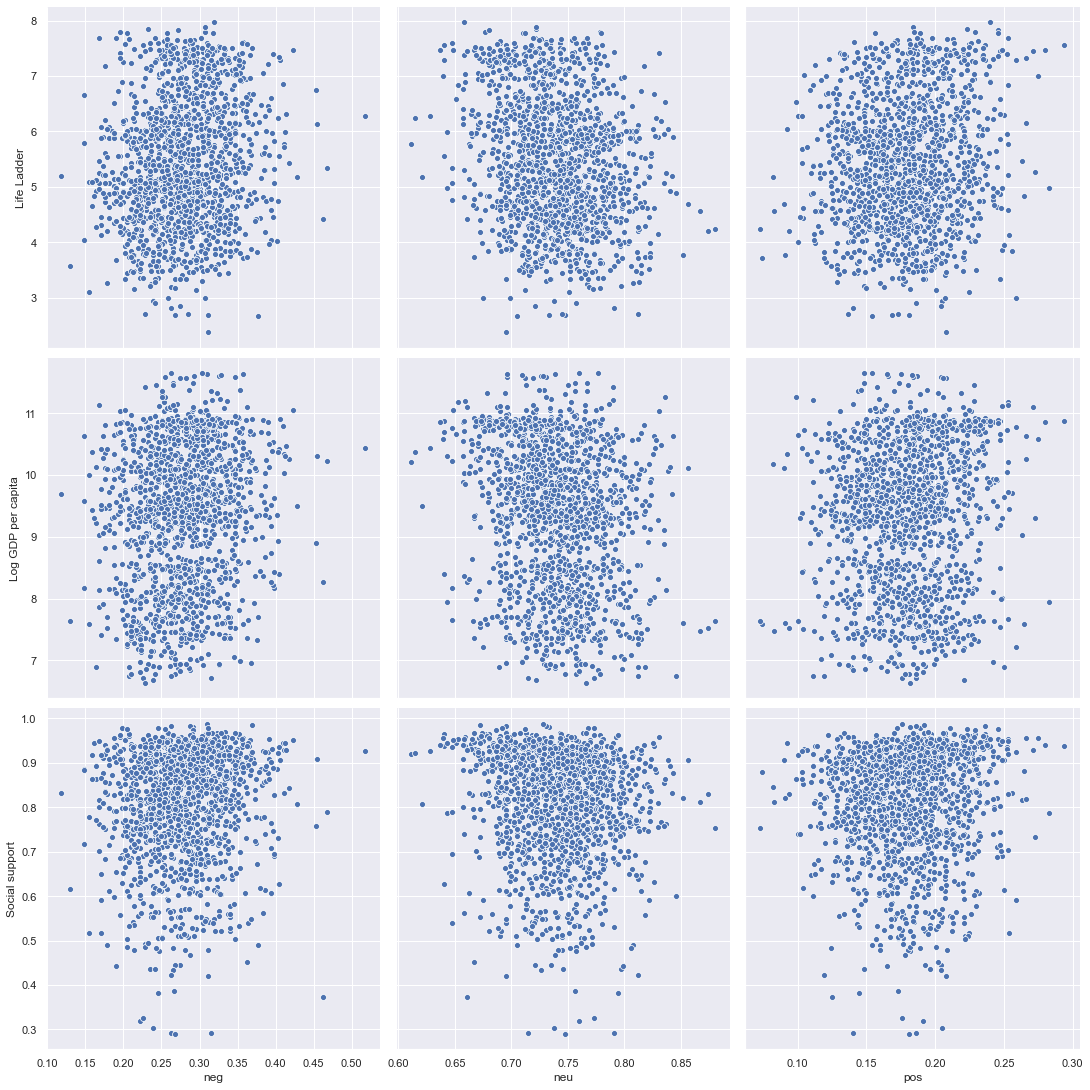

In [28]:
sns.set()
s = ["neg", "neu", "pos"]
h = ["Life Ladder", "Log GDP per capita", "Social support"]
t = sns.pairplot(data, x_vars=s, y_vars=h, height=5)


Well, that looks like a blob. Maybe the correlation is only due to the outliers?